I'm gonna overwrite a lot of this notebook's old content. I changed the way I'm calculating wt, and wanna test that my training worked. 

In [1]:
from pearce.emulator import OriginalRecipe, ExtraCrispy
from pearce.mocks import cat_dict
import numpy as np
from os import path

In [2]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
%%bash
ls ~/des/Pearce*.hdf5

/u/ki/swmclau2/des/PearceRedMagicWpCosmo.hdf5
/u/ki/swmclau2/des/PearceRedMagicWpCosmo2.hdf5
/u/ki/swmclau2/des/PearceRedMagicWpCosmoTest.hdf5
/u/ki/swmclau2/des/PearceRedMagicXiChinchilla.hdf5
/u/ki/swmclau2/des/PearceRedMagicXiCosmo.hdf5
/u/ki/swmclau2/des/PearceRedMagicXiCosmoTest.hdf5
/u/ki/swmclau2/des/PearceTrainerTest1.hdf5


In [4]:
training_file = '/u/ki/swmclau2/des/PearceRedMagicXiChinchilla.hdf5'
test_file = '/u/ki/swmclau2/des/PearceRedMagicXiCosmoTest.hdf5'
em_method = 'gp'
split_method = 'random'

In [5]:
a = 1.0
z = 1.0/a - 1.0

In [6]:
fixed_params = {'z':z}#, 'r':24.06822623}

In [7]:
emu = OriginalRecipe(training_file, method = em_method, fixed_params=fixed_params, downsample_factor=1.0)#,
                    #hyperparams = {'n_estimators': 500,
                    #              'max_depth': 5})

/u/ki/swmclau2/.local/lib/python2.7/site-packages/pearce/emulator/emu.py:265: UserWarning: WARNING: NaN detected. Skipped 885 points in training data.
  warnings.warn('WARNING: NaN detected. Skipped %d points in training data.' % (num_skipped))


In [8]:
v = np.array([-107.63201595,   -3.00623478,    1.30030219,   73.91837015,
         -1.24519356,   61.31984424,   -2.73478191,   80.84539419,
         86.27226179,  -16.47626201,  -30.44683545,  -35.42641201,
        -12.96207967,  -43.95549179,   -3.36130433,   37.9852565 ,
          3.28282274,   57.71964132,  105.93552856,   30.52956235,
         81.30883655,   46.50496736,   -4.63570007,    2.25765005,
        -11.86949411,   83.41893473,   75.44653974])

In [10]:
emu.scale_bin_centers

array([ 0.09581734,  0.13534558,  0.19118072,  0.27004994,  0.38145568,
        0.53882047,  0.76110414,  1.07508818,  1.51860241,  2.14508292,
        3.03001016,  4.28000311,  6.04566509,  8.53972892, 12.06268772,
       17.0389993 , 24.06822623, 33.99727318])

In [11]:
emu.n_bins

18

In [12]:
#print emu.x.shape
#print emu.downsample_x.shape
if hasattr(emu, "_emulators"):
    print emu._emulators[0]._x.shape
else:
    print emu._emulator._x.shape

(20070, 7)


In [13]:
emu._ordered_params

OrderedDict([('logM1', (13.0, 15.0)),
             ('logMmin', (11.5, 13.5)),
             ('f_c', (0.01, 0.5)),
             ('logM0', (12.0, 16.0)),
             ('sigma_logM', (0.05, 0.6)),
             ('alpha', (0.8, 1.2)),
             ('r', (-1.1000000189853054, 1.6000000000507297))])

In [14]:
gof = emu.goodness_of_fit(training_file, statistic = 'log_frac')
print gof.mean()

0.0004984742965169185


In [15]:
gof = emu.goodness_of_fit(training_file, statistic = 'frac')
print gof.mean()

0.0012155622478991672


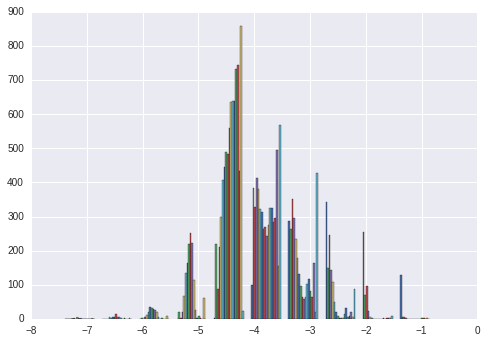

In [16]:
plt.hist(np.log10(gof) );

In [17]:
model = emu._emulator
ypred = model.predict(emu.y, emu.x, False, False, False)*emu._y_std+emu._y_mean

In [18]:
resids = np.abs(emu.y*emu._y_std+emu._y_mean - ypred)

In [19]:
np.mean(resids/(emu.y*emu._y_std+emu._y_mean))

0.00018267353634993853

In [20]:
ypred.mean(), emu._y_mean

(1.5811828755830635, 1.5815369709438643)

In [21]:
test_gof = emu.goodness_of_fit(test_file, statistic = 'log_frac')
print test_gof.mean()

/u/ki/swmclau2/.local/lib/python2.7/site-packages/pearce/emulator/emu.py:265: UserWarning: WARNING: NaN detected. Skipped 2232 points in training data.
  warnings.warn('WARNING: NaN detected. Skipped %d points in training data.' % (num_skipped))


ValueError: operands could not be broadcast together with shapes (85824,13) (7,) 

In [ ]:
test_gof = emu.goodness_of_fit(test_file, statistic = 'frac')
print test_gof.mean()

In [ ]:
plt.hist(np.log10(test_gof));

In [ ]:
test_x, test_y, test_yerr, _ = emu.get_data(test_file,fixed_params, None)

In [ ]:
test_x

In [ ]:
(emu.x*emu._x_std) + emu._x_mean

In [ ]:
emu.get_param_names()

In [ ]:
test_x_white, test_y_white = (test_x - emu._x_mean)/(emu._x_std + 1e-5), (test_y - emu._y_mean)/(emu._y_std + 1e-5)

In [ ]:
model = emu._emulator

In [ ]:
pred_y_white = model.predict(emu.y, test_x_white, False, False, False)

In [ ]:
pred_y = pred_y_white*emu._y_std + emu._y_mean

In [ ]:
plt.plot(pred_y[:100], label = 'pred')
plt.plot(test_y[:100], label = 'truth')

plt.legend(loc = 'best')

In [ ]:
test_y.mean(), emu._y_mean, pred_y.mean()

In [ ]:
test_y.std(), emu._y_std, pred_y.std()

In [ ]:
plt.hist(pred_y_white, bins = np.linspace(-3, 3, 100), label = 'Pred')
plt.hist(test_y_white, bins = np.linspace(-3, 3, 100), label = 'Test');
plt.legend(loc = 'best')